In [74]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Numerical experiments have shown us that $q_{\infin}$ is larger in the random ferromagnet than in the EA model, however, that is based on an averaged scale of Monte Carlo methods. What if we look at the RF model and the EA model in the same initial configuration? And for all the couplings $J_{i,j}$ in the EA model, we simply duplicate their absolute values to the RF model.

In [75]:
def get_bound_EA(index1, index2, bonds):
    bond = frozenset({tuple(index1),tuple(index2)})
    if bond in bonds:
        return bonds[bond]
    else:
        bonds[bond] = np.random.standard_normal()
        return bonds[bond]

In [76]:
bonds = dict()

In [77]:
def increase_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] += 1
    return A_modified

In [78]:
def decrease_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] -= 1
    return A_modified

In [79]:
def increase_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] += 1
    return A_modified

def decrease_entry_by_one(A, j):
    A_modified = A.copy()
    A_modified[j] -= 1
    return A_modified

def get_neighbor(indices,L):
    neighbor_index = []
    for j in range(len(indices)):
        if (indices[j] == 0):
            neighbor_index.append(increase_entry_by_one(indices, j))
            indice_copy = indices.copy()
            indice_copy[j] = L-1
            neighbor_index.append(indice_copy)
        elif (indices[j] == L-1):
            neighbor_index.append(decrease_entry_by_one(indices, j))
            indice_copy = indices.copy()
            indice_copy[j] = 0
            neighbor_index.append(indice_copy)
        else:
            neighbor_index.append(increase_entry_by_one(indices, j))
            neighbor_index.append(decrease_entry_by_one(indices, j))
    return neighbor_index

In [80]:
def get_energy(spin, spin_index, neighbor_index, S):
    energy = 0
    for neighbor in neighbor_index:
        bond = get_bound_EA(spin_index, neighbor, bonds)
        energy = energy + bond*spin*S[tuple(neighbor)]
    return energy

In [81]:
def overlap(S1,S2,N):
    return np.sum(S1*S2)/N

def sweep(S,L,N):
    sweep = 0
    while sweep < N:
        indices = [np.random.choice(dim) for dim in S.shape]
        spin = S[tuple(indices)]
        neighbor_index = get_neighbor(indices,L)
        beforeE = get_energy(spin, indices, neighbor_index, S)
        afterE = get_energy(-spin, indices, neighbor_index, S)
        deltaE = afterE - beforeE
        if deltaE > 0:
            S[tuple(indices)] = -spin
        sweep = sweep+1

In [82]:
def is_active(index, S, L):
    spin = S[tuple(index)]
    neighbor_index = get_neighbor(np.asarray(index),L)
    beforeE = get_energy(spin, index, neighbor_index, S)
    afterE = get_energy(-spin, index, neighbor_index, S)
    deltaE = afterE - beforeE
    return deltaE > 0

In [83]:
def get_active(S,L):
    it = np.nditer(S,flags = ['multi_index'])
    active_indices = []
    while not it.finished:
        index = it.multi_index
        if is_active(index, S, L):
            active_indices.append(index)
        it.iternext()
    return active_indices

In [84]:
import random

def kineticMonteCarlo(S,L,active_list):
    l = len(active_list)
    if l == 0:
        return 0
    t = 1/l
    index = random.choice(active_list)
    spin = S[tuple(index)]
    neighbor_index = get_neighbor(np.asarray(index),L)
    beforeE = get_energy(spin, index, neighbor_index, S)
    afterE = get_energy(-spin, index, neighbor_index, S)
    deltaE = afterE - beforeE
    if deltaE > 0:
        S[tuple(index)] = -spin
        active_list.remove(tuple(index))
        for nspin in neighbor_index:
            if is_active(nspin,S,L):
                if not (tuple(nspin) in active_list):
                    active_list.append(tuple(nspin))
            else:
                if (tuple(nspin) in active_list):
                    active_list.remove(tuple(nspin))
    return t

In [85]:
length = 100
dimension = 2
N = length ** dimension
config = np.random.choice([-1, 1], size=tuple([length] * dimension))
S2_EA = config.copy()
S1_EA = config.copy()
S2_RF = config.copy()
S1_RF = config.copy()

In [86]:
survival1 = 0
survival2 = 0
while len(get_active(S1_EA,length)) != 0:
    sweep(S1_EA,length,N)
    survival1 = survival1 + 1
while len(get_active(S2_EA,length)) != 0:
    sweep(S2_EA,length,N)
    survival2 = survival2 + 1

In [87]:
overlap(S1_EA,S2_EA,N)

0.4302

In [88]:
bonds = {key: abs(value) for key, value in bonds.items()}

In [89]:
survival1_RF = 0
survival2_RF = 0
while len(get_active(S1_RF,length)) != 0:
    sweep(S1_RF,length,N)
    survival1_RF = survival1_RF + 1
while len(get_active(S2_RF,length)) != 0:
    sweep(S2_RF,length,N)
    survival2_RF = survival2_RF + 1

In [90]:
overlap(S1_RF,S2_RF,N)

0.423

In [91]:
overlap(S1_RF,S1_EA,N)

0.1068

In [92]:
overlap_EA = []
overlap_RF = []

for i in range(10):
    bonds = dict()
    length = 100
    dimension = 2
    N = length ** dimension
    config = np.random.choice([-1, 1], size=tuple([length] * dimension))
    S2_EA = config.copy()
    S1_EA = config.copy()
    S2_RF = config.copy()
    S1_RF = config.copy()

    survival1_EA = 0
    survival2_EA = 0
    while len(get_active(S1_EA,length)) != 0:
        sweep(S1_EA,length,N)
        survival1 = survival1 + 1
    while len(get_active(S2_EA,length)) != 0:
        sweep(S2_EA,length,N)
        survival2 = survival2 + 1
    overlap_EA.append(overlap(S1_EA,S2_EA,N))

    bonds = {key: abs(value) for key, value in bonds.items()}

    survival1_RF = 0
    survival2_RF = 0
    while len(get_active(S1_RF,length)) != 0:
        sweep(S1_RF,length,N)
        survival1_RF = survival1_RF + 1
    while len(get_active(S2_RF,length)) != 0:
        sweep(S2_RF,length,N)
        survival2_RF = survival2_RF + 1
    overlap_RF.append(overlap(S1_RF,S2_RF,N))
    

In [95]:
sum(overlap_EA)/len(overlap_EA)

0.42864

In [96]:
sum(overlap_RF)/len(overlap_RF)

0.42723999999999995

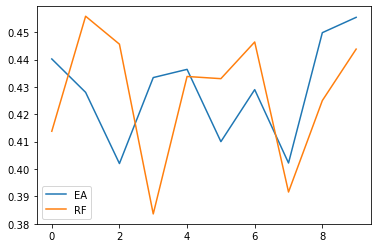

In [101]:
plt.plot(overlap_EA, label = 'EA')
plt.plot(overlap_RF, label = 'RF')
plt.legend()

We can see throughout our simulation, there are still mulitple times that $q_{\infin}$ is larger in EA model than in RF model, hence we may conjecture that the difference in $q_{\infin}$ has no dependency on the initial configuration of the models, but instead, mostly depends on the realization of the models' dynamics.

What if we try 'damage spreading' on the two different models? That is to say, try same dynamical realization on these two models.